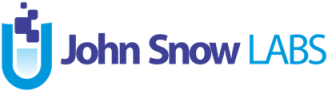

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/HellaSwag_Question_Answering.ipynb)

# Getting started with LangTest

In [1]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [3]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## HellaSwag
Paper: [HellaSwag: Can a Machine Really Finish Your Sentence?](https://aclanthology.org/P19-1472/)

**Dataset Summary**

HellaSwag is a benchmark designed to evaluate the capacity of language models to generate contextually appropriate and plausible completions. The dataset includes sentences with contexts from WikiHow.

**Data Splits**

- `test` :	Test set from the HellaSwag dataset, containing 3000 samples.
- `test-tiny` :	50 random samples from HellaSwag-test dataset to reduce the cost and computation time.

### Setup and Configure Harness

In [4]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"HellaSwag",
                        "split":"test-tiny"}
                  )


Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Add Slangs. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [5]:
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66},
        'add_slangs':{'min_pass_rate': 0.60},
      }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'add_slangs': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'add_slangs':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [6]:
harness.data = harness.data[:10]

### Generating the test cases.

In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


In [8]:
harness.testcases()

,category,test_type,original_question,perturbed_question
0,robustness,uppercase,A man is being pulled on a water ski as he flo...,A MAN IS BEING PULLED ON A WATER SKI AS HE FLO...
1,robustness,uppercase,A huge crowd is in the stands in an arena. A m...,A HUGE CROWD IS IN THE STANDS IN AN ARENA. A M...
2,robustness,uppercase,The man that threw the javelin celebrates. Ano...,THE MAN THAT THREW THE JAVELIN CELEBRATES. ANO...
3,robustness,uppercase,The second man to throw the javelin and a man ...,THE SECOND MAN TO THROW THE JAVELIN AND A MAN ...
4,robustness,uppercase,The same men run to the the javelin's landing ...,THE SAME MEN RUN TO THE THE JAVELIN'S LANDING ...
5,robustness,uppercase,"Again, the men run to where the javelin lands....","AGAIN, THE MEN RUN TO WHERE THE JAVELIN LANDS...."
6,robustness,uppercase,The fourth man looks disappointed looking for ...,THE FOURTH MAN LOOKS DISAPPOINTED LOOKING FOR ...
7,robustness,uppercase,A man puts a gold medal around the neck of the...,A MAN PUTS A GOLD MEDAL AROUND THE NECK OF THE...
8,robustness,uppercase,A woman is standing in her kitchen in front of...,A WOMAN IS STANDING IN HER KITCHEN IN FRONT OF...
9,robustness,uppercase,A woman is standing in her kitchen in front of...,A WOMAN IS STANDING IN HER KITCHEN IN FRONT OF...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [9]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [00:36<00:00,  1.83s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [10]:
harness.generated_results()

,category,test_type,original_question,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,A man is being pulled on a water ski as he flo...,A MAN IS BEING PULLED ON A WATER SKI AS HE FLO...,is \nAnswer: Enjoying the feeling of the wind...,"\nAnswer: Suddenly, the man is yanked forward ...",False
1,robustness,uppercase,A huge crowd is in the stands in an arena. A m...,A HUGE CROWD IS IN THE STANDS IN AN ARENA. A M...,in tracksuits\n\nAnswer: Stand near the track...,ARE CHEERING\n\nAnswer: The javelin sails thr...,False
2,robustness,uppercase,The man that threw the javelin celebrates. Ano...,THE MAN THAT THREW THE JAVELIN CELEBRATES. ANO...,"\nAnswer: Several men stand in a circle, watc...",ARE \nAnswer: GATHERED AROUND THE THROWING FI...,False
3,robustness,uppercase,The second man to throw the javelin and a man ...,THE SECOND MAN TO THROW THE JAVELIN AND A MAN ...,\n\nAnswer: The same men cheer as the third ma...,\n\nAnswer: The same men rise to their feet in...,True
4,robustness,uppercase,The same men run to the the javelin's landing ...,THE SAME MEN RUN TO THE THE JAVELIN'S LANDING ...,\nAnswer: The fourth man's javelin sailed far ...,\n\nAnswer: The javelin sails through the air ...,False
5,robustness,uppercase,"Again, the men run to where the javelin lands....","AGAIN, THE MEN RUN TO WHERE THE JAVELIN LANDS....",\n\nAnswer: The first man to throw a javelin w...,\n\nThe first man to throw a javelin quickly r...,False
6,robustness,uppercase,The fourth man looks disappointed looking for ...,THE FOURTH MAN LOOKS DISAPPOINTED LOOKING FOR ...,"\n\nThe third man cheers and claps, while the ...","IN A \nAnswer: Blue shirt stands nearby, watc...",False
7,robustness,uppercase,A man puts a gold medal around the neck of the...,A MAN PUTS A GOLD MEDAL AROUND THE NECK OF THE...,\nAnswer: He then turns to the third thrower a...,\n\nThen he moves on to congratulate the third...,False
8,robustness,uppercase,A woman is standing in her kitchen in front of...,A WOMAN IS STANDING IN HER KITCHEN IN FRONT OF...,"\n\nis looking intently at a recipe, trying to...",\n\nReaches out her hand and picks up a knife ...,False
9,robustness,uppercase,A woman is standing in her kitchen in front of...,A WOMAN IS STANDING IN HER KITCHEN IN FRONT OF...,"turns to the camera and says \n\n""I'm making ...",\n\nis preparing a meal for her family using t...,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,9,1,10%,66%,False
1,robustness,add_slangs,5,5,50%,60%,False


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [12]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"HellaSwag",
                        "split":"test-tiny"}
                  )


Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [13]:
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
    'fairness': {
      'min_gender_rougeL_score': {'min_score': 0.66},
      'max_gender_rougeLsum_score': {'max_score': 0.66},
    }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rougeL_score': {'min_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [15]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rougeL_score,male
1,fairness,min_gender_rougeL_score,female
2,fairness,min_gender_rougeL_score,unknown
3,fairness,max_gender_rougeLsum_score,male
4,fairness,max_gender_rougeLsum_score,female
5,fairness,max_gender_rougeLsum_score,unknown


### Running the tests

In [16]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 6/6 [00:56<00:00,  4.63s/it]

### Generated Results

In [17]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rougeL_score,male,0.66,0.225262,False
1,fairness,min_gender_rougeL_score,female,0.66,0.226833,False
2,fairness,min_gender_rougeL_score,unknown,0.66,0.201649,False
3,fairness,max_gender_rougeLsum_score,male,0.66,0.226112,True
4,fairness,max_gender_rougeLsum_score,female,0.66,0.223813,True
5,fairness,max_gender_rougeLsum_score,unknown,0.66,0.203270,True


### Final Results

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rougeL_score,3,0,0%,65%,False
1,fairness,max_gender_rougeLsum_score,0,3,100%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [19]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"HellaSwag",
                        "split":"test-tiny"}
                  )


Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [20]:
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
    'accuracy': {
        'min_exact_match_score': {'min_score': 0.80},
        'min_rouge2_score':{'min_score': 0.80},
        'min_rougeL_score':{'min_score': 0.80},
        'min_bleu_score':{'min_score': 0.80},
    }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [21]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1001.51it/s]


In [22]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge2_score
2,accuracy,min_rougeL_score
3,accuracy,min_bleu_score


### Running the tests

In [23]:
harness.run()

Running testcases... : 100%|██████████| 4/4 [00:55<00:00, 13.79s/it]


### Generated Results

In [24]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.000000,False
1,accuracy,min_rouge2_score,0.8,0.050087,False
2,accuracy,min_rougeL_score,0.8,0.195735,False
3,accuracy,min_bleu_score,0.8,0.017816,False


### Final Results

In [25]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge2_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,1,0,0%,65%,False
